In [2]:
!pip install ucimlrepo

In [3]:
!pip install us

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.9/356.9 kB 9.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.express as px
import re
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
import statsmodels as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from statsmodels.api import OLS
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
communities_and_crime = fetch_ucirepo(id=183)
X = communities_and_crime.data.features
Y = communities_and_crime.data.targets

In [6]:
og_df = pd.concat([X, Y], axis=1)

In [46]:
og_df.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

In [7]:
og_df

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12      ?         ?    TempleTerracecity    10        0.01   
1990      6      ?         ?          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6      ?         ?          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05          ?              ?                    ?   
1990     0.37            0.20          ?              ?                    ?   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1989                    ?                 0.00                ?   
1990                    ?                 0.00                ?   
1991                    0                 0.91             0.28   
1992                    0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [8]:
og_df.to_csv('communities_and_crime.csv')

Columns in dataset:
['Unnamed: 0', 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8'

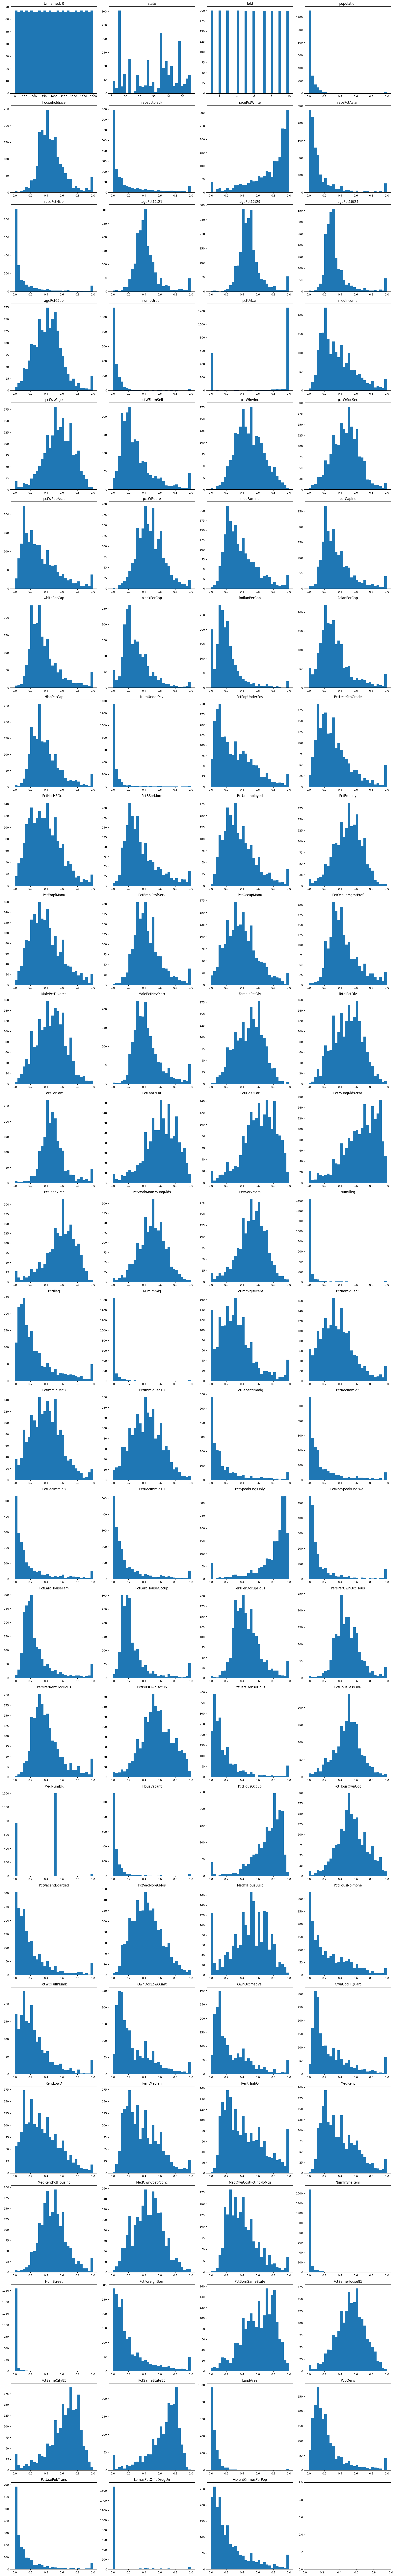

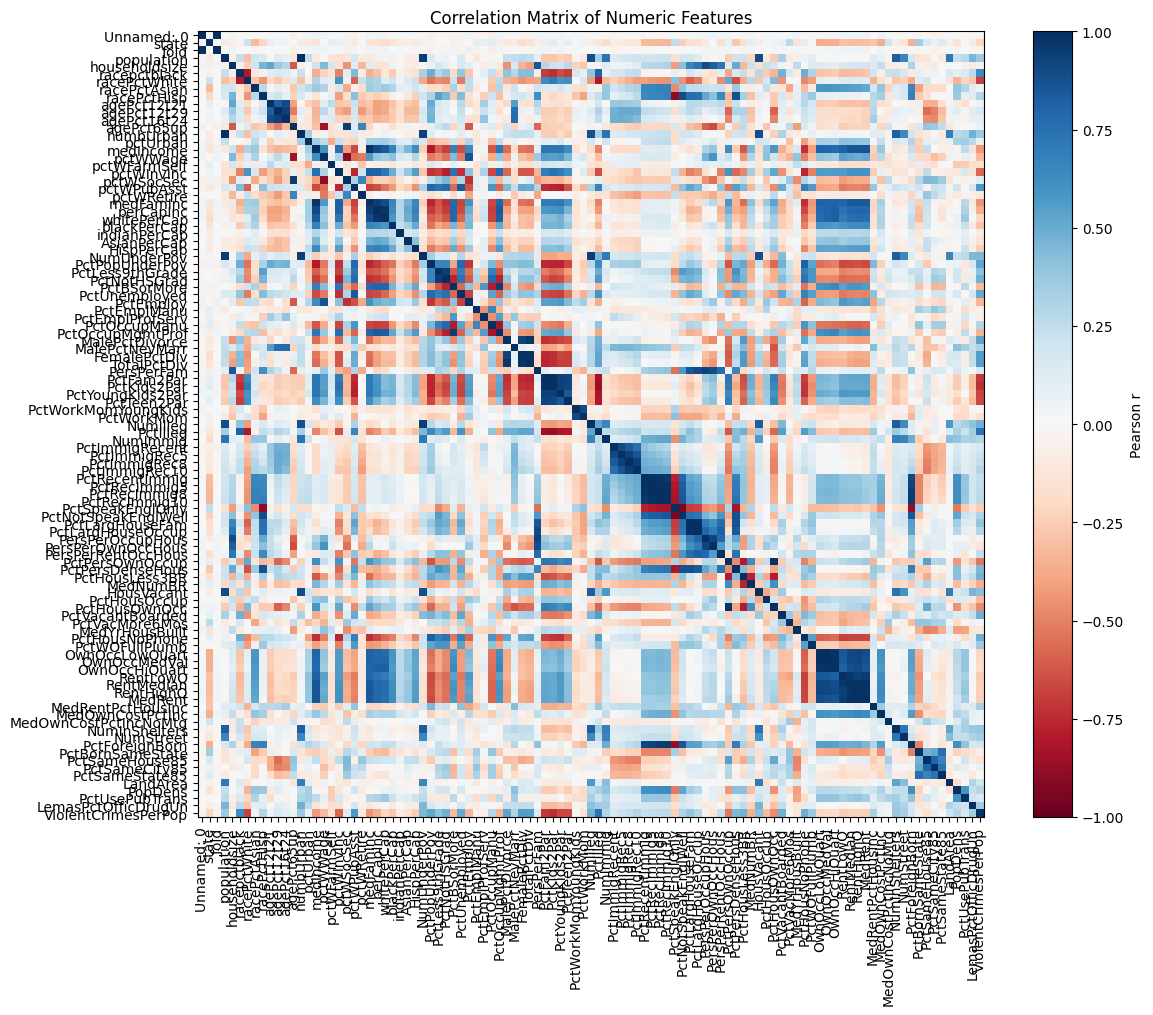

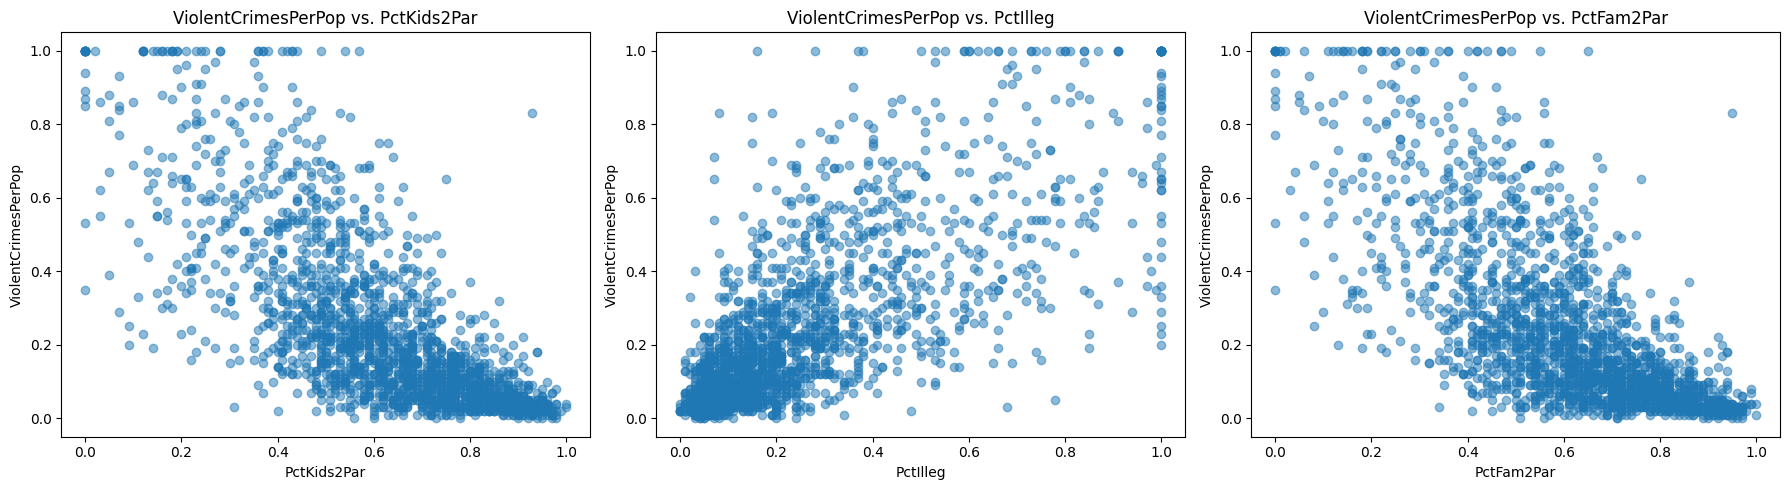

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load the data and inspect columns
df = pd.read_csv('/content/communities_and_crime.csv')
print("Columns in dataset:")
print(df.columns.tolist())

# 2) Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:")
print(numeric_cols)

# 3) Plot histograms for all numeric columns (quick scan)
fig, axes = plt.subplots(len(numeric_cols)//4 + 1, 4, figsize=(20, 5*(len(numeric_cols)//4 + 1)))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    ax.hist(df[col].dropna(), bins=30)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# 4) Correlation matrix heatmap
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(label="Pearson r")
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# 5) Scatter plots: top 3 features most correlated with the crime rate
target = 'ViolentCrimesPerPop'
if target in numeric_cols:
    # get correlations with target
    cor_target = corr[target].abs().sort_values(ascending=False)
    top_feats = cor_target.index[1:4]  # top 3 except itself
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    for ax, feat in zip(axs, top_feats):
        ax.scatter(df[feat], df[target], alpha=0.5)
        ax.set_xlabel(feat)
        ax.set_ylabel(target)
        ax.set_title(f"{target} vs. {feat}")
    plt.tight_layout()
    plt.show()
else:
    print(f"Target column '{target}' not found. Please verify its name.")

In [10]:
geo_crime = og_df[['state', 'county', 'community', 'communityname', 'ViolentCrimesPerPop']]

In [11]:
geo_crime

state county community        communityname  ViolentCrimesPerPop
0         8      ?         ?         Lakewoodcity                 0.20
1        53      ?         ?          Tukwilacity                 0.67
2        24      ?         ?         Aberdeentown                 0.43
3        34      5     81440  Willingborotownship                 0.12
4        42     95      6096    Bethlehemtownship                 0.03
...     ...    ...       ...                  ...                  ...
1989     12      ?         ?    TempleTerracecity                 0.09
1990      6      ?         ?          Seasidecity                 0.45
1991      9      9     80070        Waterburytown                 0.23
1992     25     17     72600          Walthamcity                 0.19
1993      6      ?         ?          Ontariocity                 0.48

[1994 rows x 5 columns]

In [12]:
geo_crime['communityname'] = geo_crime['communityname'].str.replace(r'city', ' ', regex=True)


<ipython-input-12-a51988d33fff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_crime['communityname'] = geo_crime['communityname'].str.replace(r'city', ' ', regex=True)


In [13]:
geo_crime['communityname'] = geo_crime['communityname'].str.replace(r'town', ' ', regex=True)

<ipython-input-13-d7f8be433f21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_crime['communityname'] = geo_crime['communityname'].str.replace(r'town', ' ', regex=True)


In [14]:
geo_crime['communityname'] = geo_crime['communityname'].str.replace(r'ship', ' ', regex=True)

<ipython-input-14-5f3187f495e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_crime['communityname'] = geo_crime['communityname'].str.replace(r'ship', ' ', regex=True)


In [15]:
from us import states


# 2) zero-pad the FIPS (in case they’re e.g. ‘1’ instead of ‘01’)
geo_crime["state_fips"] = geo_crime["state"].astype(str).str.zfill(2)

# 3) build a mapping fips → state name (or abbreviation)
fips_to_name = {s.fips: s.name for s in states.STATES}      # full names
fips_to_abbr = {s.fips: s.abbr for s in states.STATES}

# 4) map into new column
geo_crime["state_name"] = geo_crime["state_fips"].map(fips_to_name)
geo_crime["state_abbr"] = geo_crime["state_fips"].map(fips_to_abbr)

# 5) confirm
print(geo_crime[["state_fips","state_name"]].drop_duplicates().head())

  state_fips    state_name
0         08      Colorado
1         53    Washington
2         24      Maryland
3         34    New Jersey
4         42  Pennsylvania


<ipython-input-15-9a8bd9d8056f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_crime["state_fips"] = geo_crime["state"].astype(str).str.zfill(2)
<ipython-input-15-9a8bd9d8056f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_crime["state_name"] = geo_crime["state_fips"].map(fips_to_name)
<ipython-input-15-9a8bd9d8056f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [16]:
geo_crime.head()

state county community  communityname  ViolentCrimesPerPop state_fips  \
0      8      ?         ?      Lakewood                  0.20         08   
1     53      ?         ?       Tukwila                  0.67         53   
2     24      ?         ?      Aberdeen                  0.43         24   
3     34      5     81440  Willingboro                   0.12         34   
4     42     95      6096    Bethlehem                   0.03         42   

     state_name state_abbr  
0      Colorado         CO  
1    Washington         WA  
2      Maryland         MD  
3    New Jersey         NJ  
4  Pennsylvania         PA

In [47]:
og_df.isna().sum().sum()

np.int64(0)

In [17]:
df_state = (
    geo_crime
      .groupby('state_abbr', as_index=False)
      .agg(avg_crime=('ViolentCrimesPerPop','mean'))
)

fig = px.choropleth(
    df_state,
    locations='state_abbr',            # two‐letter codes
    locationmode='USA-states',
    color='avg_crime',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'avg_crime':'Avg violent crimes\n(per pop)'},
    title='Average Violent‐Crime Rate by State'
)
fig.update_layout(margin=dict(l=0,r=0,t=30,b=0))
fig.show()

In [18]:
###this section is from the EDA section
# Handling Missing Value
#X = X.drop(columns=["state", "county", "community", "communityname", "fold"])
X = X.replace('?',np.nan)

label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for i in categorical_columns:
    X[i] = label_encoder.fit_transform(X[i])


# Standardization
scaler = StandardScaler(with_mean=True, with_std=True)
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

colnames =X.columns

X_train, X_test, Y_train, Y_test = train_test_split(
    X_standardized,
    Y,
    test_size=0.2,
    shuffle=True
)

X_df = pd.DataFrame(X_standardized, columns=colnames)
Y_series = Y.values.flatten() if hasattr(Y, "values") else Y

# Pearson 线性相关性(Linear dependence)
pearson_corr = X_df.corrwith(pd.Series(Y_series))
pearson_corr_abs = pearson_corr.abs().sort_values(ascending=False)

# Mutual Information 非线性相关性(Non Linear dependence）
mi_scores = mutual_info_regression(X_df, Y_series, random_state=0)
mi_scores = pd.Series(mi_scores, index=X_df.columns).sort_values(ascending=False)


# 创建 DataFrame 汇总两个指标
correlation_table = pd.DataFrame({
    "Pearson": pearson_corr,                 # 原始线性相关系数（可正可负）
    "Pearson_abs": pearson_corr_abs,         # 绝对值，用于排名
    "Mutual_Info": mi_scores                 # 互信息分数（越高越重要）
})
# 根据任意一列排序，例如按 Pearson 绝对值排序
correlation_table_sorted = correlation_table.sort_values(by="Pearson_abs", ascending=False)

correlation_table_sorted.head(15)
#correlation_table_sorted.to_csv("correlation_table_sorted.csv", index=True)

Pearson  Pearson_abs  Mutual_Info
PctKids2Par      -0.738424     0.738424     0.476651
PctIlleg          0.737957     0.737957     0.434099
PctFam2Par       -0.706667     0.706667     0.386894
racePctWhite     -0.684770     0.684770     0.340401
PctYoungKids2Par -0.666059     0.666059     0.327991
PctTeen2Par      -0.661582     0.661582     0.318558
racepctblack      0.631264     0.631264     0.243286
pctWInvInc       -0.576324     0.576324     0.288574
pctWPubAsst       0.574665     0.574665     0.278926
FemalePctDiv      0.556032     0.556032     0.291811
TotalPctDiv       0.552777     0.552777     0.268847
PctPersOwnOccup  -0.525491     0.525491     0.221350
MalePctDivorce    0.525407     0.525407     0.220781
PctPopUnderPov    0.521877     0.521877     0.289483
PctUnemployed     0.504235     0.504235     0.193231

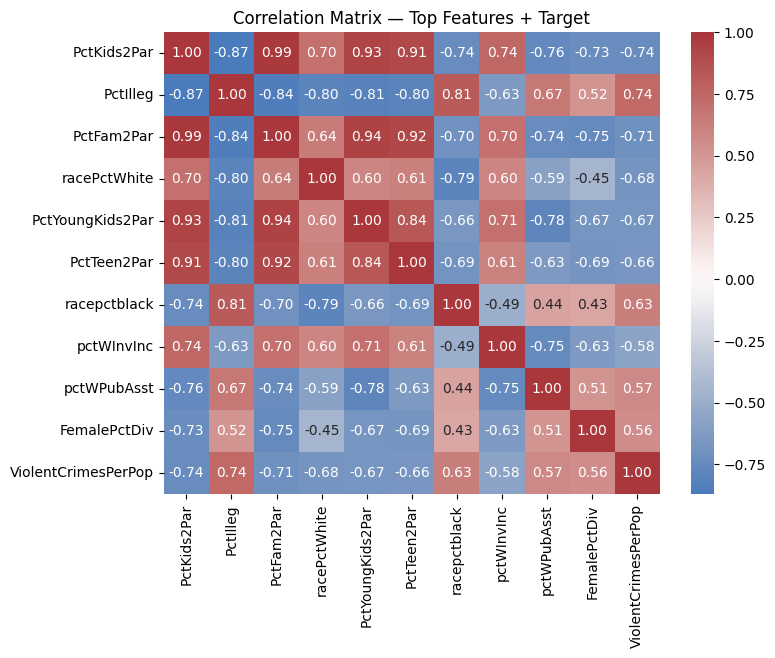

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(eda.corr(), annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation Matrix — Top Features + Target")
plt.show()
plt.savefig('matrixy')

In [19]:
top_10 = correlation_table_sorted[:10].index.tolist()

                      count      mean       std  min     25%   50%   75%  max
PctKids2Par          1994.0  0.620657  0.206353  0.0  0.4900  0.64  0.78  1.0
PctIlleg             1994.0  0.249995  0.229946  0.0  0.0900  0.17  0.32  1.0
PctFam2Par           1994.0  0.610918  0.201976  0.0  0.4900  0.63  0.76  1.0
racePctWhite         1994.0  0.753716  0.244039  0.0  0.6300  0.85  0.94  1.0
PctYoungKids2Par     1994.0  0.664032  0.218749  0.0  0.5300  0.70  0.84  1.0
PctTeen2Par          1994.0  0.582884  0.191507  0.0  0.4800  0.61  0.72  1.0
racepctblack         1994.0  0.179629  0.253442  0.0  0.0200  0.06  0.23  1.0
pctWInvInc           1994.0  0.495687  0.178071  0.0  0.3700  0.48  0.62  1.0
pctWPubAsst          1994.0  0.317778  0.222137  0.0  0.1425  0.26  0.44  1.0
FemalePctDiv         1994.0  0.487568  0.175170  0.0  0.3600  0.50  0.62  1.0
ViolentCrimesPerPop  1994.0  0.237979  0.232985  0.0  0.0700  0.15  0.33  1.0


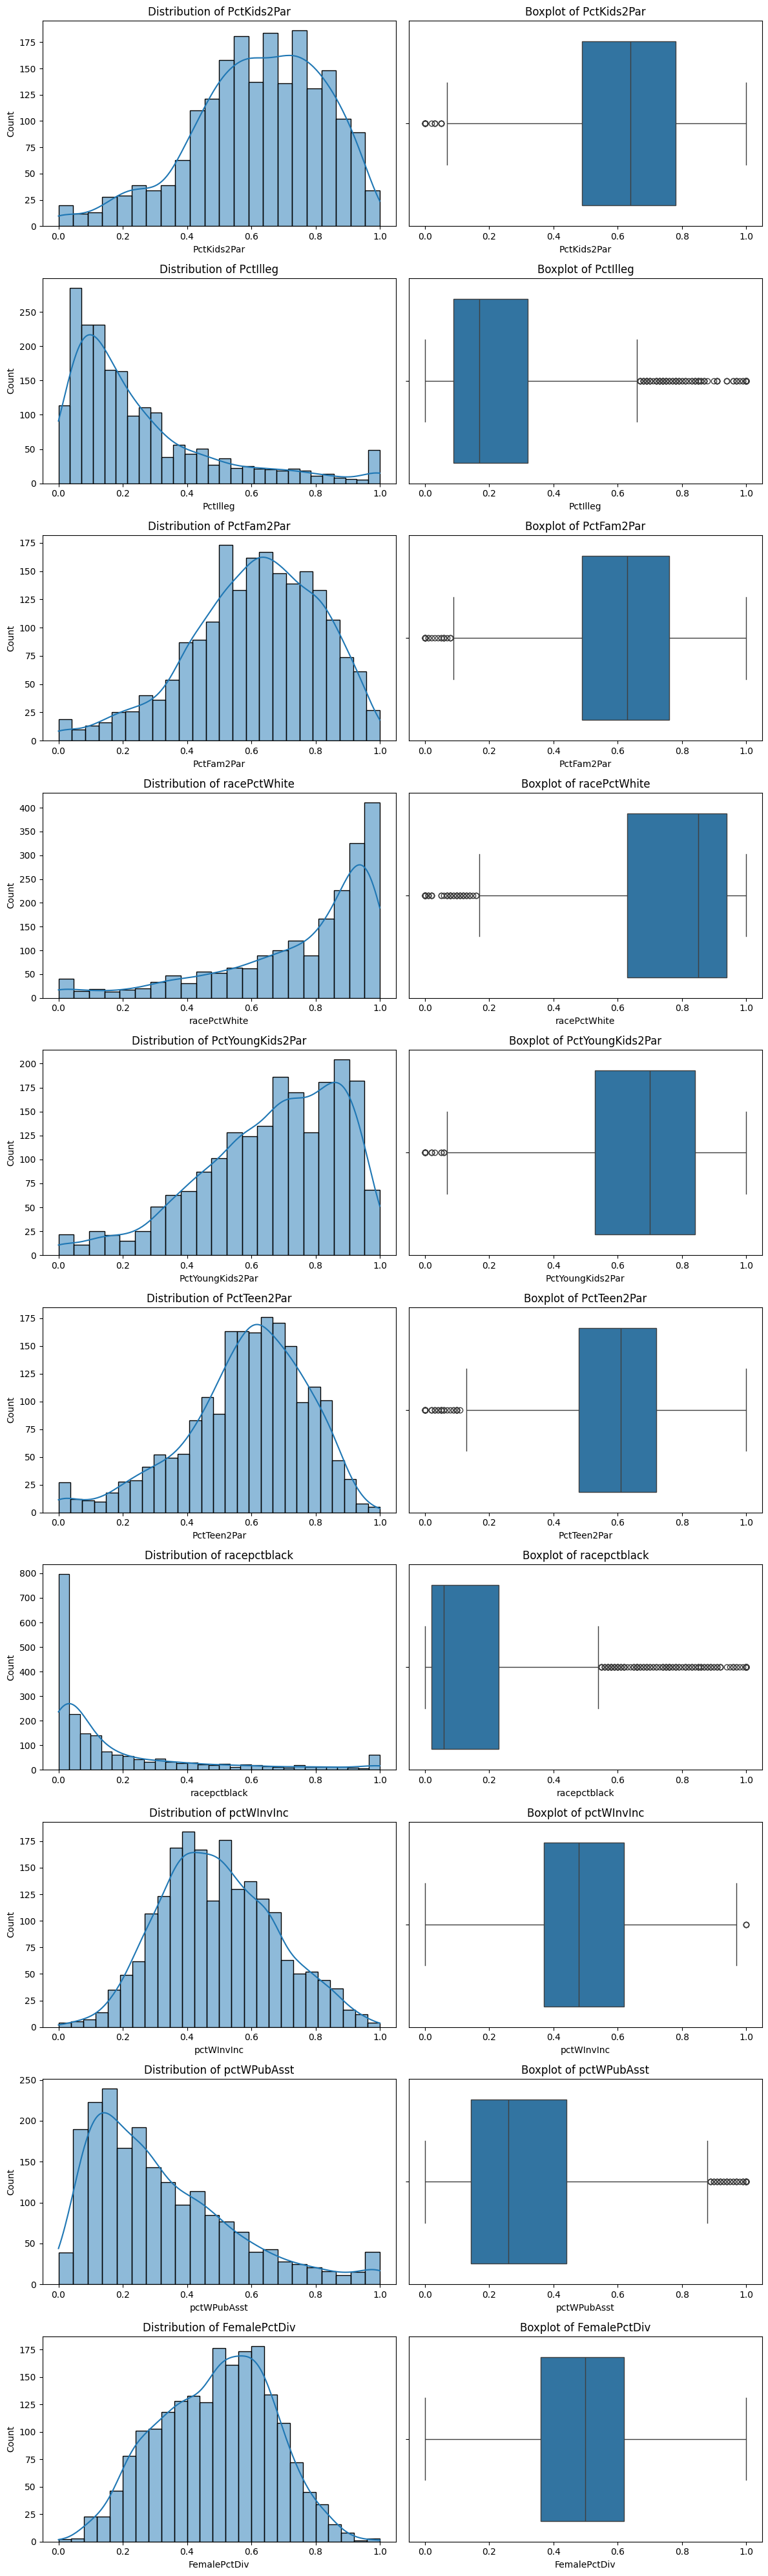

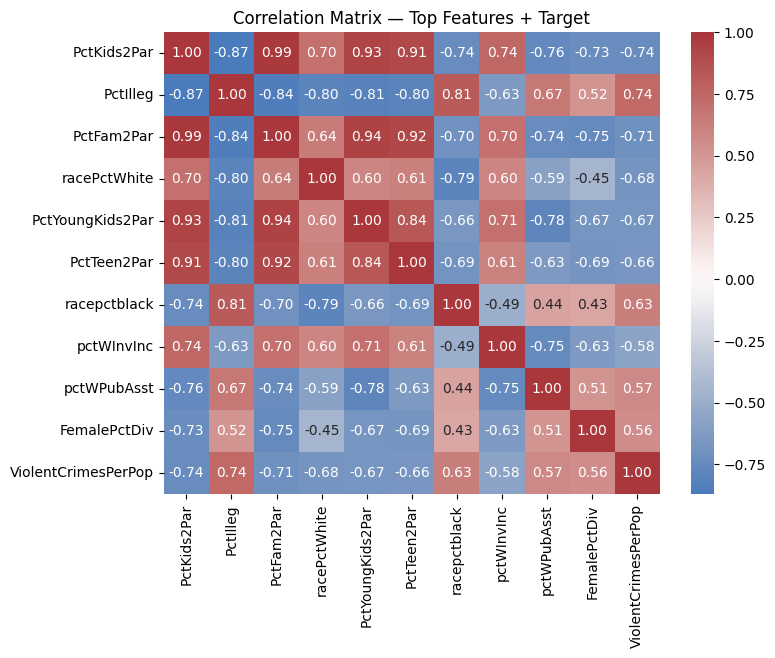

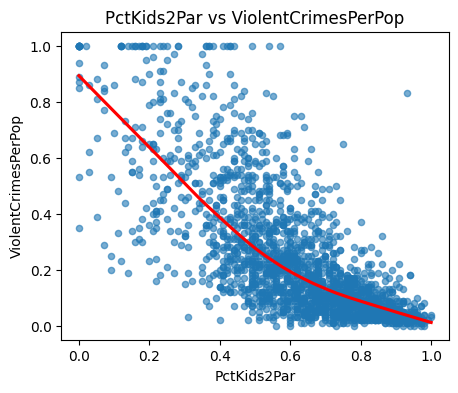

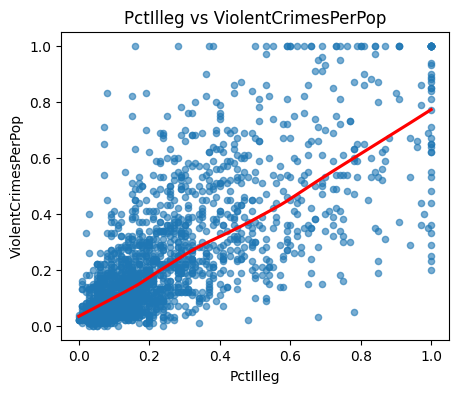

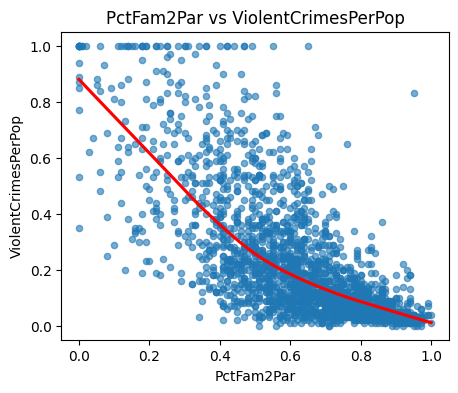

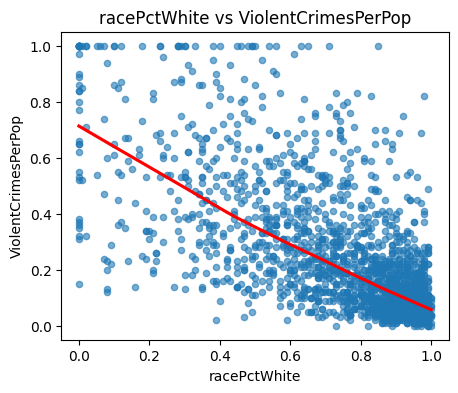

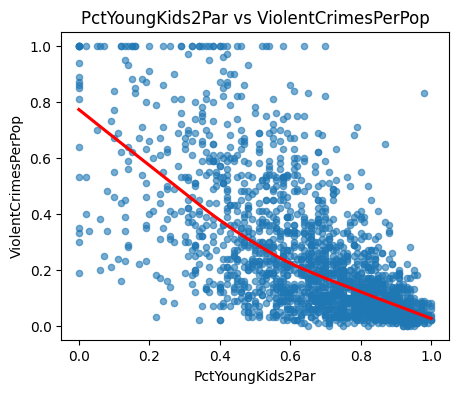

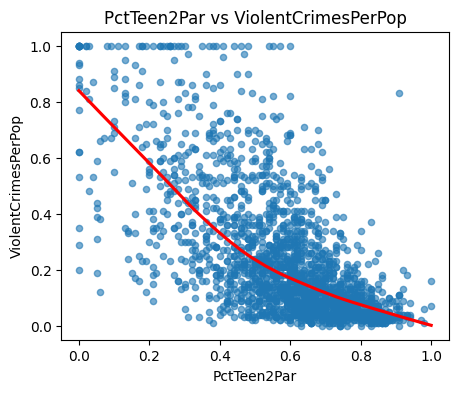

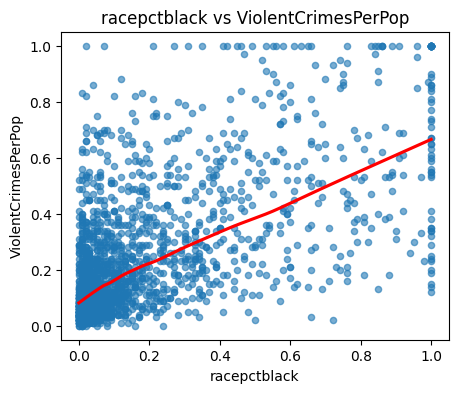

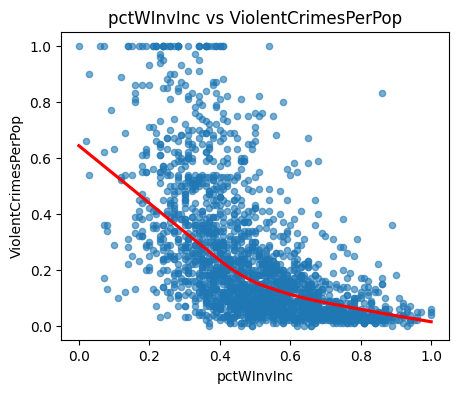

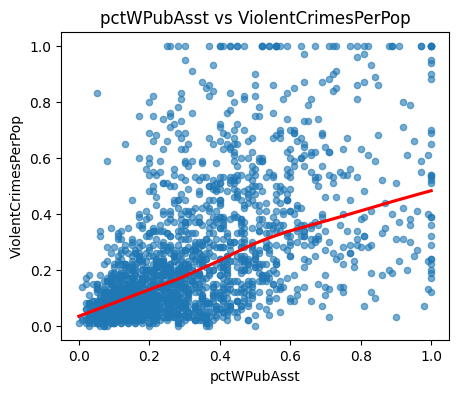

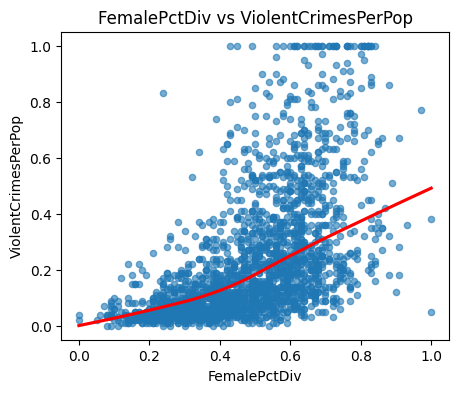

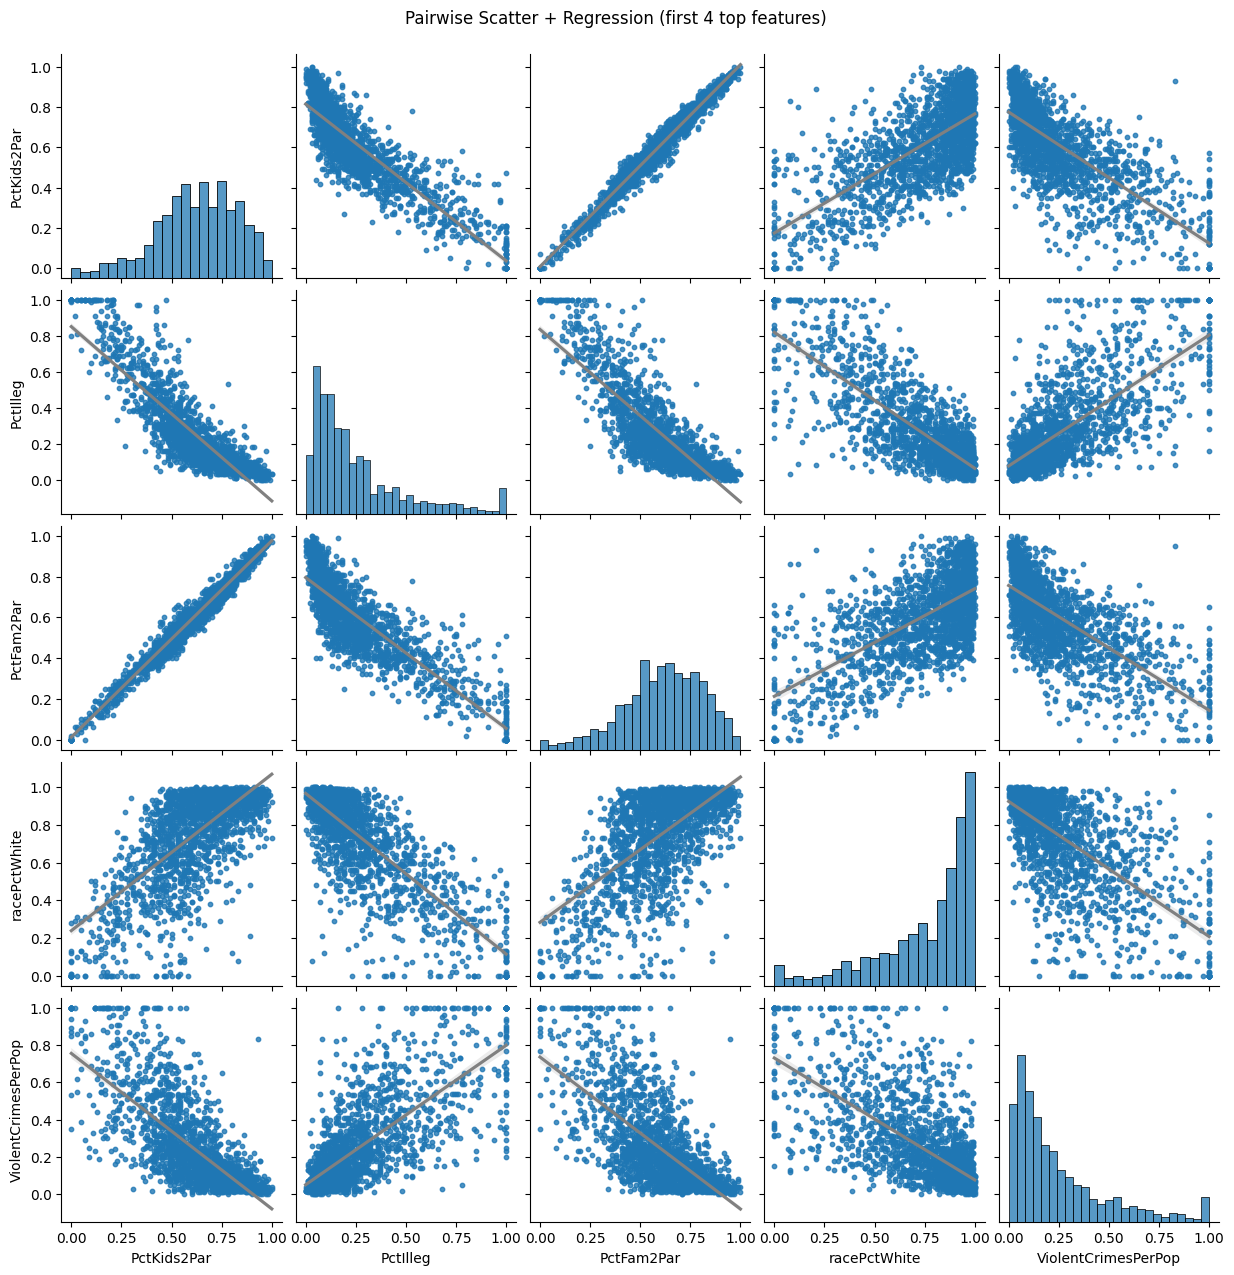

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. pick your top features (e.g. the 10 highest Pearson_abs from your correlation table)
top_vars = correlation_table_sorted.head(10).index.tolist()

# add the target
cols = top_vars + ['ViolentCrimesPerPop']

# 2. make a slim DataFrame for EDA
eda = df[cols]  # or geo_crime_with_latlong if you merged in geography

# 3. summary statistics
print(eda.describe().T)

# 4. distributions
fig, axes = plt.subplots(len(top_vars), 2, figsize=(12, 4*len(top_vars)))
for i, feat in enumerate(top_vars):
    sns.histplot(eda[feat], ax=axes[i,0], kde=True)
    axes[i,0].set_title(f"Distribution of {feat}")
    sns.boxplot(x=eda[feat], ax=axes[i,1])
    axes[i,1].set_title(f"Boxplot of {feat}")
plt.tight_layout()
plt.show()

# 5. correlation heatmap among top features + target
plt.figure(figsize=(8, 6))
sns.heatmap(eda.corr(), annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation Matrix — Top Features + Target")
plt.show()

# 6. scatter with target
for feat in top_vars:
    plt.figure(figsize=(5,4))
    sns.regplot(x=eda[feat], y=eda['ViolentCrimesPerPop'], lowess=True,
                scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f"{feat} vs ViolentCrimesPerPop")
    plt.show()

# 7. (optional) pairwise relationships among top 4 features
sns.pairplot(df[top_vars[:4] + ['ViolentCrimesPerPop']],
             kind='reg', plot_kws={'line_kws':{'color':'gray'}, 'scatter_kws':{'s':10}})
plt.suptitle("Pairwise Scatter + Regression (first 4 top features)", y=1.02)
plt.show()

                      count      mean       std  min     25%   50%   75%  max
PctKids2Par          1994.0  0.620657  0.206353  0.0  0.4900  0.64  0.78  1.0
PctIlleg             1994.0  0.249995  0.229946  0.0  0.0900  0.17  0.32  1.0
PctFam2Par           1994.0  0.610918  0.201976  0.0  0.4900  0.63  0.76  1.0
racePctWhite         1994.0  0.753716  0.244039  0.0  0.6300  0.85  0.94  1.0
PctYoungKids2Par     1994.0  0.664032  0.218749  0.0  0.5300  0.70  0.84  1.0
PctTeen2Par          1994.0  0.582884  0.191507  0.0  0.4800  0.61  0.72  1.0
racepctblack         1994.0  0.179629  0.253442  0.0  0.0200  0.06  0.23  1.0
pctWInvInc           1994.0  0.495687  0.178071  0.0  0.3700  0.48  0.62  1.0
pctWPubAsst          1994.0  0.317778  0.222137  0.0  0.1425  0.26  0.44  1.0
FemalePctDiv         1994.0  0.487568  0.175170  0.0  0.3600  0.50  0.62  1.0
ViolentCrimesPerPop  1994.0  0.237979  0.232985  0.0  0.0700  0.15  0.33  1.0


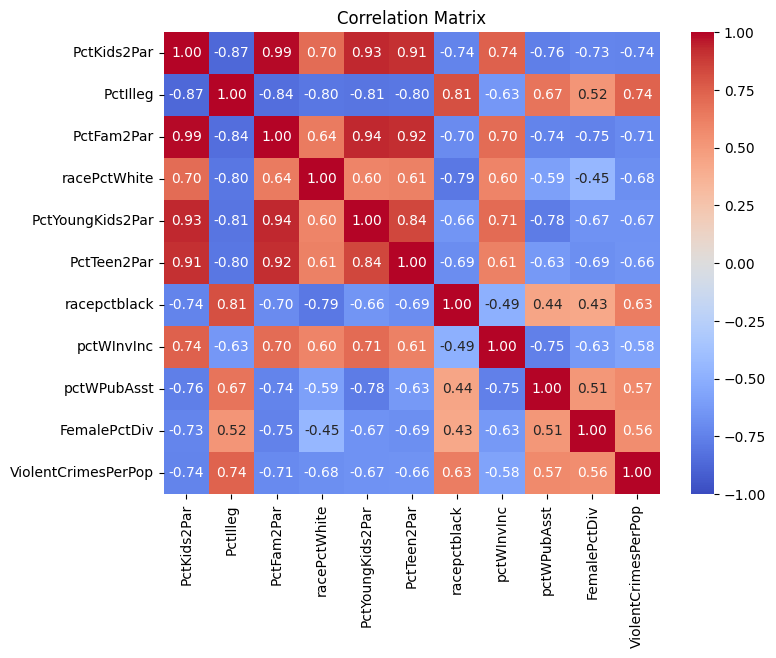

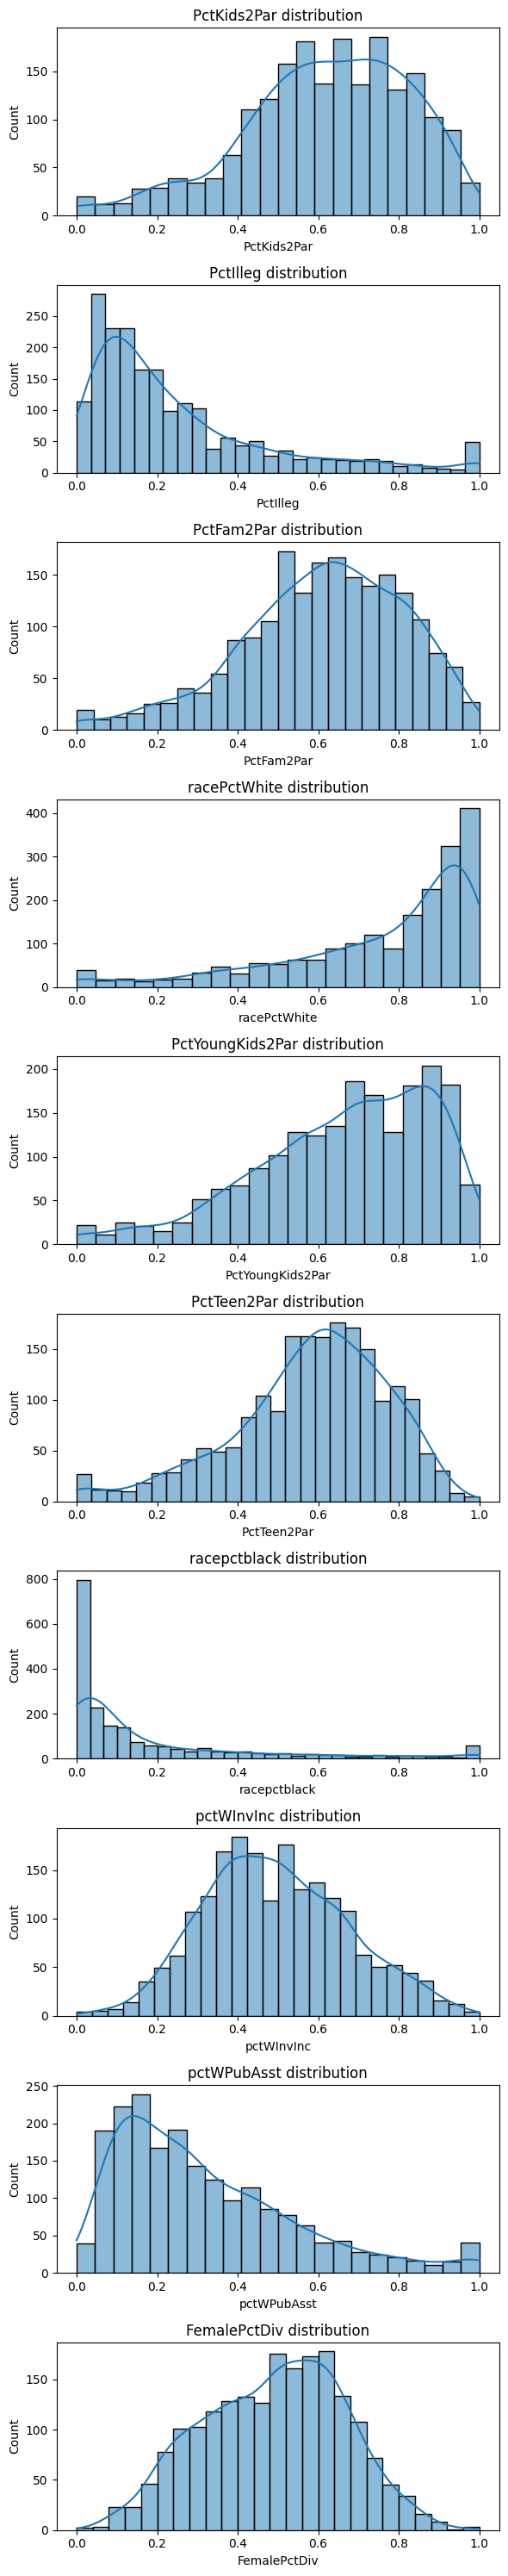

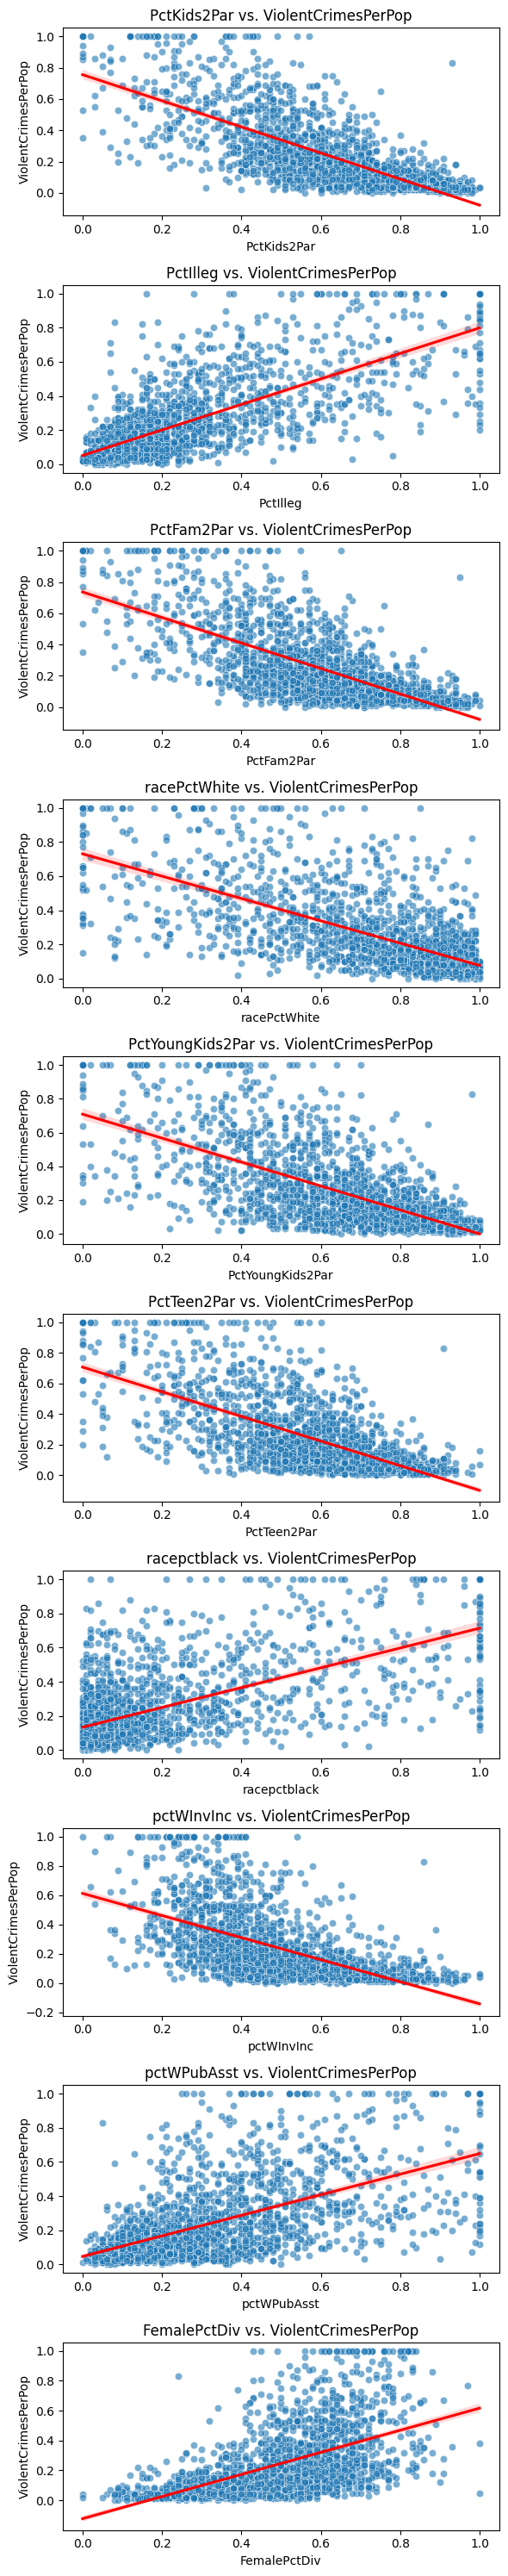

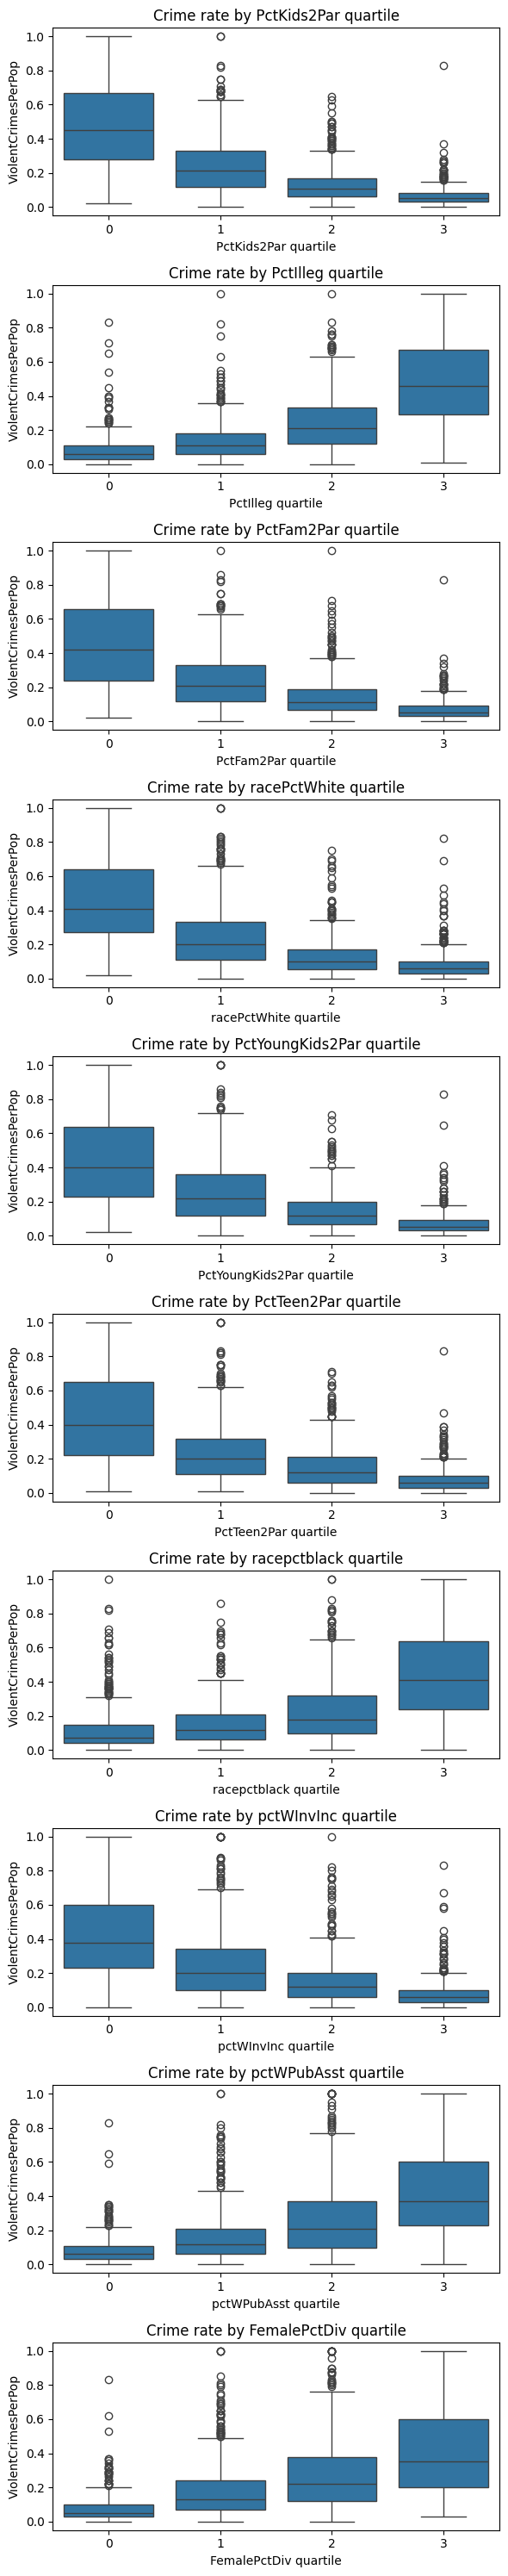

In [21]:
##using some of the feature engineering-oriented data to inspect relationship of high correlation variables with target variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/communities_and_crime.csv')

#summaries
print(df[top_vars + ['ViolentCrimesPerPop']].describe().T)

top_feats = correlation_table_sorted.head(10).index.tolist()

#correlation heatmap of top featuers
plt.figure(figsize=(8,6))
sns.heatmap(
    df[top_feats + ['ViolentCrimesPerPop']].corr(),
    annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1
)
plt.title("Correlation Matrix")
plt.show()

#univaraite correlations
fig, axes = plt.subplots(len(top_feats), 1, figsize=(6, 3*len(top_feats)))
for ax, feat in zip(axes, top_feats):
    sns.histplot(df[feat].dropna(), ax=ax, kde=True)
    ax.set_title(f"{feat} distribution")
plt.tight_layout()
plt.show()

#top features vs. target scatterplots + trendline:
fig, axes = plt.subplots(len(top_feats), 1, figsize=(6, 3*len(top_feats)))
for ax, feat in zip(axes, top_feats):
    sns.scatterplot(x=feat, y='ViolentCrimesPerPop', data=df, ax=ax, alpha=0.6)
    sns.regplot(x=feat, y='ViolentCrimesPerPop', data=df, ax=ax, scatter=False, color='red')
    ax.set_title(f"{feat} vs. ViolentCrimesPerPop")
plt.tight_layout()
plt.show()

#Boxplots by quartile of feature (to catch non‐linearities)
fig, axes = plt.subplots(len(top_feats), 1, figsize=(6, 3*len(top_feats)))
for ax, feat in zip(axes, top_feats):
    # bin into quartiles
    df['quartile'] = pd.qcut(df[feat], 4, labels=False, duplicates='drop')
    sns.boxplot(x='quartile', y='ViolentCrimesPerPop', data=df, ax=ax)
    ax.set_xlabel(f"{feat} quartile")
    ax.set_title(f"Crime rate by {feat} quartile")
plt.tight_layout()
plt.show()

In [22]:
geo_crime

state county community   communityname  ViolentCrimesPerPop state_fips  \
0         8      ?         ?       Lakewood                  0.20         08   
1        53      ?         ?        Tukwila                  0.67         53   
2        24      ?         ?       Aberdeen                  0.43         24   
3        34      5     81440   Willingboro                   0.12         34   
4        42     95      6096     Bethlehem                   0.03         42   
...     ...    ...       ...             ...                  ...        ...   
1989     12      ?         ?  TempleTerrace                  0.09         12   
1990      6      ?         ?        Seaside                  0.45         06   
1991      9      9     80070      Waterbury                  0.23         09   
1992     25     17     72600        Waltham                  0.19         25   
1993      6      ?         ?        Ontario                  0.48         06   

         state_name state_abbr  
0          Colorado         CO  
1        Washington         WA  
2          Maryland         MD  
3        New Jersey         NJ  
4      Pennsylvania         PA  
...             ...        ...  
1989        Florida         FL  
1990     California         CA  
1991    Connecticut         CT  
1992  Massachusetts         MA  
1993     California         CA  

[1994 rows x 8 columns]

In [32]:
# Step 1: Prepare your base
required_columns = ['state', 'ViolentCrimesPerPop'] + top_10
df_subset = og_df[required_columns].copy()
df_subset["state"] = df_subset["state"].astype(str).str.zfill(2)

# Step 2: FIPS mapping
fips_to_name = {s.fips: s.name for s in states.STATES}
fips_to_abbr = {s.fips: s.abbr for s in states.STATES}
df_subset["state_name"] = df_subset["state"].map(fips_to_name)
df_subset["state_abbr"] = df_subset["state"].map(fips_to_abbr)

# Step 3: Group by state name
state_summary = df_subset.groupby(['state_name', 'state_abbr'], as_index=False).mean(numeric_only=True)

# Step 4: Multiply selected variables by 100 for percentages
percent_vars = [
    'PctKids2Par', 'PctIlleg', 'PctFam2Par', 'racePctWhite', 'PctYoungKids2Par',
    'PctTeen2Par', 'racepctblack', 'pctWInvInc', 'pctWPubAsst', 'FemalePctDiv'
]
state_summary[percent_vars] = state_summary[percent_vars] * 100
state_summary = state_summary.round(2)

# Step 5: Rename for clarity
rename_dict = {
    'PctKids2Par': 'Kids in 2-Parent Homes (%)',
    'PctIlleg': 'Births to Single Mothers (%)',
    'PctFam2Par': '2-Parent Families (%)',
    'racePctWhite': 'White Population (%)',
    'PctYoungKids2Par': 'Young Kids in 2-Parent Homes (%)',
    'PctTeen2Par': 'Teens in 2-Parent Homes (%)',
    'racepctblack': 'Black Population (%)',
    'pctWInvInc': 'White Investment Income (%)',
    'pctWPubAsst': 'White Public Assistance (%)',
    'FemalePctDiv': 'Divorced Women (%)',
    'ViolentCrimesPerPop': 'Avg Violent Crimes per Pop'
}
state_summary = state_summary.rename(columns=rename_dict)
hover_data = list(rename_dict.values())[1:]  # Exclude target color variable

# Step 6: Plot
fig = px.choropleth(
    state_summary,
    locations='state_abbr',
    locationmode='USA-states',
    color='Avg Violent Crimes per Pop',
    hover_data=['state_name'] + hover_data,
    scope="usa",
    color_continuous_scale="Reds",
    title="Crime Rate by State with Top 10 Correlated Community Variables"
)

fig.update_layout(
    margin=dict(r=0, t=60, l=0, b=0),
    title={'x': 0.5, 'xanchor': 'center'}
)

fig.show()

In [37]:
# Approximate lat/lon for state labels (state abbreviations as keys)
state_centers = {
    'AL': (32.806671, -86.791130), 'AK': (61.370716, -152.404419), 'AZ': (33.729759, -111.431221),
    'AR': (34.969704, -92.373123), 'CA': (36.116203, -119.681564), 'CO': (39.059811, -105.311104),
    'CT': (41.597782, -72.755371), 'DE': (39.318523, -75.507141), 'FL': (27.766279, -81.686783),
    'GA': (33.040619, -83.643074), 'HI': (21.094318, -157.498337), 'ID': (44.240459, -114.478828),
    'IL': (40.349457, -88.986137), 'IN': (39.849426, -86.258278), 'IA': (42.011539, -93.210526),
    'KS': (38.526600, -96.726486), 'KY': (37.668140, -84.670067), 'LA': (31.169546, -91.867805),
    'ME': (44.693947, -69.381927), 'MD': (39.063946, -76.802101), 'MA': (42.230171, -71.530106),
    'MI': (43.326618, -84.536095), 'MN': (45.694454, -93.900192), 'MS': (32.741646, -89.678696),
    'MO': (38.456085, -92.288368), 'MT': (46.921925, -110.454353), 'NE': (41.125370, -98.268082),
    'NV': (38.313515, -117.055374), 'NH': (43.452492, -71.563896), 'NJ': (40.298904, -74.521011),
    'NM': (34.840515, -106.248482), 'NY': (42.165726, -74.948051), 'NC': (35.630066, -79.806419),
    'ND': (47.528912, -99.784012), 'OH': (40.388783, -82.764915), 'OK': (35.565342, -96.928917),
    'OR': (44.572021, -122.070938), 'PA': (40.590752, -77.209755), 'RI': (41.680893, -71.511780),
    'SC': (33.856892, -80.945007), 'SD': (44.299782, -99.438828), 'TN': (35.747845, -86.692345),
    'TX': (31.054487, -97.563461), 'UT': (40.150032, -111.862434), 'VT': (44.045876, -72.710686),
    'VA': (37.769337, -78.169968), 'WA': (47.400902, -121.490494), 'WV': (38.491226, -80.954571),
    'WI': (44.268543, -89.616508), 'WY': (42.755966, -107.302490)
}

In [38]:
state_summary["latitude"] = state_summary["state_abbr"].map(lambda x: state_centers[x][0])
state_summary["longitude"] = state_summary["state_abbr"].map(lambda x: state_centers[x][1])

In [39]:
import plotly.graph_objects as go

# Main map (use your existing fig or px.choropleth)
fig = px.choropleth(
    state_summary,
    locations='state_abbr',
    locationmode='USA-states',
    color='Avg Violent Crimes per Pop',
    hover_data=hover_data,
    scope="usa",
    color_continuous_scale="Reds",
    title="Crime Rate by State with Top 10 Correlated Community Variables"
)

# Add labels using Scattergeo
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=state_summary['longitude'],
    lat=state_summary['latitude'],
    text=state_summary['state_name'],
    mode='text',
    textfont=dict(color='black', size=10),
    showlegend=False
))

fig.update_layout(
    margin=dict(r=0, t=60, l=0, b=0),
    title={'x': 0.5, 'xanchor': 'center'}
)
fig.show()

In [40]:
fig.write_html("state_crime_dashboard.html", include_plotlyjs="cdn")
from google.colab import files
files.download("state_crime_dashboard.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
# Top 10 states with highest violent crime rates and their top features
top_10_states = state_summary.sort_values(by='Avg Violent Crimes per Pop', ascending=False).head(10)

import pandas as pd
from IPython.display import display

# Only show relevant columns (first column is state name)
columns_to_display = ['state_name', 'Avg Violent Crimes per Pop'] + list(rename_dict.values())
display(top_10_states[columns_to_display])

state_name  Avg Violent Crimes per Pop  Kids in 2-Parent Homes (%)  \
15       Louisiana                        0.50                       35.41   
34  South Carolina                        0.49                       46.89   
17        Maryland                        0.48                       37.17   
8          Florida                        0.46                       48.48   
27  North Carolina                        0.40                       40.20   
0          Alabama                        0.39                       50.67   
9          Georgia                        0.38                       33.59   
7         Delaware                        0.37                       43.00   
13          Kansas                        0.36                       58.00   
25      New Mexico                        0.34                       53.90   

    Births to Single Mothers (%)  2-Parent Families (%)  White Population (%)  \
15                         57.55                  37.55                 47.27   
34                         47.43                  47.75                 55.46   
17                         53.75                  34.42                 58.83   
8                          31.84                  48.91                 74.29   
27                         49.52                  39.43                 52.87   
0                          37.53                  51.95                 59.16   
9                          56.62                  34.03                 42.86   
7                          56.00                  45.00                 47.00   
13                         30.00                  56.00                 73.00   
25                         30.50                  53.60                 66.50   

    Young Kids in 2-Parent Homes (%)  Teens in 2-Parent Homes (%)  \
15                             38.55                        33.64   
34                             53.04                        44.25   
17                             45.42                        33.33   
8                              55.52                        46.74   
27                             42.91                        39.02   
0                              58.02                        49.72   
9                              36.03                        31.51   
7                              56.00                        47.00   
13                             61.00                        52.00   
25                             48.50                        54.40   

    Black Population (%)  White Investment Income (%)  \
15                 62.45                        29.05   
34                 53.39                        37.54   
17                 44.67                        41.25   
8                  28.04                        49.48   
27                 55.80                        34.85   
0                  47.02                        36.16   
9                  66.08                        31.70   
7                  60.00                        48.00   
13                 22.00                        45.00   
25                  5.50                        35.50   

    White Public Assistance (%)  Divorced Women (%)  \
15                        58.41               60.27   
34                        34.61               51.86   
17                        37.75               68.92   
8                         24.68               58.38   
27                        39.89               58.91   
0                         38.35               52.09   
9                         51.86               67.49   
7                         34.00               57.00   
13                        29.00               63.00   
25                        47.60               56.80   

    Avg Violent Crimes per Pop  
15                        0.50  
34                        0.49  
17                        0.48  
8                         0.46  
27                        0.40  
0                         0.39  
9                         0.38  

In [42]:
# Top 10 states with lowest violent crime rates and their top features
top_10_states = state_summary.sort_values(by='Avg Violent Crimes per Pop', ascending=True).head(10)

import pandas as pd
from IPython.display import display

# Only show relevant columns (first column is state name)
columns_to_display = ['state_name', 'Avg Violent Crimes per Pop'] + list(rename_dict.values())
display(top_10_states[columns_to_display])

state_name  Avg Violent Crimes per Pop  Kids in 2-Parent Homes (%)  \
28   North Dakota                        0.04                       74.75   
39        Vermont                        0.05                       63.75   
16          Maine                        0.06                       62.94   
23  New Hampshire                        0.07                       74.52   
43      Wisconsin                        0.07                       74.40   
35   South Dakota                        0.09                       71.56   
38           Utah                        0.10                       80.17   
6     Connecticut                        0.11                       74.00   
10          Idaho                        0.11                       74.57   
44        Wyoming                        0.12                       72.29   

    Births to Single Mothers (%)  2-Parent Families (%)  White Population (%)  \
28                         11.88                  68.38                 95.88   
39                         20.75                  57.25                 97.25   
16                         17.65                  59.35                 97.47   
23                         13.90                  71.90                 96.95   
43                         14.92                  69.53                 93.78   
35                         16.00                  65.89                 93.22   
38                          8.92                  75.96                 91.71   
6                          17.16                  73.46                 87.16   
10                         10.00                  69.43                 91.00   
44                         12.57                  67.29                 92.43   

    Young Kids in 2-Parent Homes (%)  Teens in 2-Parent Homes (%)  \
28                             73.00                        64.88   
39                             67.50                        57.75   
16                             63.59                        59.88   
23                             75.38                        66.86   
43                             73.77                        66.02   
35                             67.44                        64.22   
38                             77.17                        72.87   
6                              78.68                        68.03   
10                             73.57                        68.00   
44                             70.86                        69.57   

    Black Population (%)  White Investment Income (%)  \
28                  0.75                        52.75   
39                  1.25                        57.25   
16                  1.12                        50.65   
23                  1.62                        58.33   
43                  3.82                        67.08   
35                  0.78                        53.89   
38                  1.29                        46.08   
6                  10.62                        67.42   
10                  1.00                        47.86   
44                  1.57                        47.14   

    White Public Assistance (%)  Divorced Women (%)  \
28                        26.38               38.00   
39                        27.25               47.00   
16                        35.06               48.12   
23                        18.00               42.00   
43                        26.48               35.57   
35                        24.11               33.67   
38                        24.25               35.79   
6                         18.04               36.46   
10                        24.43               43.29   
44                        24.00               50.86   

    Avg Violent Crimes per Pop  
28                        0.04  
39                        0.05  
16                        0.06  
23                        0.07  
43                        0.07  
35                        0.09  
38                        0.10  
6        